In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file  = pd.read_csv('Resources/Food_Supply_Quantity_kg_Data.csv')
df = pd.DataFrame(file)
df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [3]:
df = df.drop(columns=['Country','Confirmed', 'Recovered', 'Active', 'Population', 'Unit (all except Population)','Obesity','Undernourished'])
df

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Deaths
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,0.006186
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,0.050951
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,0.006558
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,0.001461
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,0.007143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,0.004287
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,...,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,0.000036
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,...,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,0.002062
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,0.004564


In [4]:
df = df.dropna()
df

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Deaths
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,0.006186
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,0.050951
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,0.006558
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,0.001461
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,0.007143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,0.004287
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,...,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,0.000036
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,...,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,0.002062
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,0.004564


In [5]:
DeathCategory= pd.cut(x=df['Deaths'], bins=[0,0.05,0.1,0.2],
                    labels=[0,1,2], include_lowest=True)
df.insert(loc=24, column='DeathCategory', value=DeathCategory)
df

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Deaths,DeathCategory
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,0.006186,0
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,0.050951,1
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,0.006558,0
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,0.001461,0
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,0.007143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,0.004287,0
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,...,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,0.000036,0
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,...,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,0.002062,0
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,0.004564,0


In [6]:
X = df.drop(['Deaths', 'DeathCategory'], axis=1)
X

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1840,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,...,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,...,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789


In [7]:
y = df['DeathCategory']
y

0      0
1      1
2      0
3      0
4      0
      ..
165    0
166    0
167    0
168    0
169    0
Name: DeathCategory, Length: 164, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler() model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [10]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.659
k: 3, Train/Test Score: 0.821/0.610
k: 5, Train/Test Score: 0.764/0.659
k: 7, Train/Test Score: 0.780/0.610
k: 9, Train/Test Score: 0.772/0.585
k: 11, Train/Test Score: 0.780/0.610
k: 13, Train/Test Score: 0.780/0.634
k: 15, Train/Test Score: 0.756/0.610
k: 17, Train/Test Score: 0.756/0.634
k: 19, Train/Test Score: 0.748/0.610


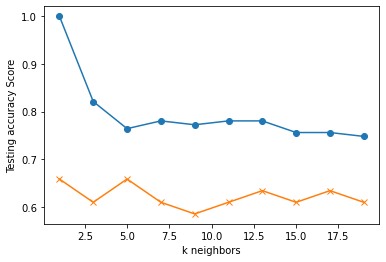

In [11]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.659
